In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
x_data.shape

(1000000,)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
noise.shape

(1000000,)

y = mx + b
 
Random init.
b = 5
m = 0.5

In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [9]:
print(x_df.head())
print(y_df.head())

    X Data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004
          Y
0  5.717388
1  4.168733
2  4.409662
3  5.203037
4  4.680920


In [10]:
df = pd.concat([x_df, y_df], axis = 1)

In [11]:
df.head()

,X Data,Y
0,0.00000,5.717388
1,0.00001,4.168733
2,0.00002,4.409662
3,0.00003,5.203037
4,0.00004,4.680920


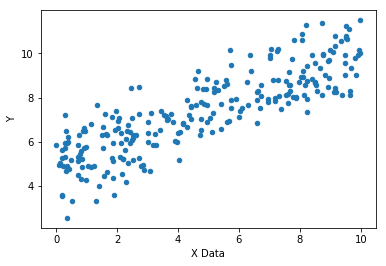

In [12]:
# Plotting Random Samples.
df.sample(n = 250).plot(kind = "scatter", x = "X Data", y = "Y")

In [13]:
# Dividing Million points into data for training.
batch_size = 8

In [14]:
# Random slope and Y Intercept
np.random.randn(2)

array([ 0.55826599, -0.85865477])

In [15]:
m = tf.Variable(1.45)
b = tf.Variable(0.10)

In [16]:
x_ph = tf.placeholder(tf.float32,[batch_size])

In [17]:
y_ph = tf.placeholder(tf.float32,[batch_size])

In [18]:
y_model = m * x_ph + b

In [19]:
error = tf.reduce_sum(tf.square(y_ph - y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])

In [23]:
model_m

0.52123195

In [24]:
model_b

4.8856754

In [25]:
y_hat = (model_m * x_data) + model_b

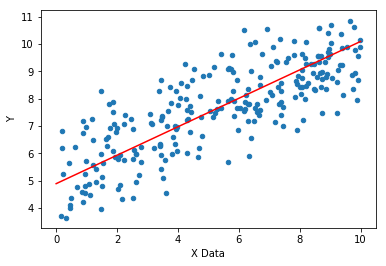

In [26]:
df.sample(n = 250).plot(kind = "scatter", x = "X Data", y = "Y")
plt.plot(x_data, y_hat, 'r')

# TensorFlow Estimator

In [27]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [28]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [29]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11cdbc978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true,
                            test_size = 0.3, random_state = 101)

In [32]:
print(x_train.shape)
print(x_test.shape)

(700000,)
(300000,)


In [33]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                batch_size = 8, num_epochs = None, shuffle = True)

In [34]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                batch_size = 8, num_epochs = 1000, shuffle = False)

In [35]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test,
                batch_size = 8, num_epochs = 1000, shuffle = False)

In [36]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17/model.ckpt.
INFO:tensorflow:loss = 409.62762, step = 1
INFO:tensorflow:global_step/sec: 887.263
INFO:tensorflow:loss = 20.022804, step = 101 (0.114 sec)
INFO:tensorflow:global_step/sec: 1208.34
INFO:tensorflow:loss = 9.541734, step = 201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1252.33
INFO:tensorflow:loss = 4.6908903, step = 301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1133.96
INFO:tensorflow:loss = 11.624213, step = 401 (0.088 sec)
INFO:tensorflow:global_step/sec: 1078.06
INFO:tensorflow:loss = 16.425169, step = 501 (0.093 sec)
INFO:tensorflow:global_step/sec: 1121.67
INFO:tensorflow:loss = 6.0264106, step = 601 (0.089 sec)
INFO:tensorflo

In [37]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-04-10:47:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-10:47:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0866996, global_step = 1000, loss = 8.693597


In [38]:
# Train Metrics
print(train_metrics)

{'average_loss': 1.0866996, 'loss': 8.693597, 'global_step': 1000}


In [39]:
test_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-04-10:47:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-10:47:09
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0447084, global_step = 1000, loss = 8.357667


In [40]:
# Test Metrics
print(test_metrics)

{'average_loss': 1.0447084, 'loss': 8.357667, 'global_step': 1000}


In [41]:
new_data = np.linspace(0,10,10)
new_predictions = tf.estimator.inputs.numpy_input_fn({'x':new_data},
                                            shuffle=False)

In [42]:
list(estimator.predict(input_fn=new_predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.457382], dtype=float32)},
 {'predictions': array([5.088744], dtype=float32)},
 {'predictions': array([5.7201056], dtype=float32)},
 {'predictions': array([6.351467], dtype=float32)},
 {'predictions': array([6.982829], dtype=float32)},
 {'predictions': array([7.61419], dtype=float32)},
 {'predictions': array([8.245552], dtype=float32)},
 {'predictions': array([8.876914], dtype=float32)},
 {'predictions': array([9.508276], dtype=float32)},
 {'predictions': array([10.139637], dtype=float32)}]

In [43]:
predictions = []

for pred in estimator.predict(input_fn=new_predictions):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpf1kluo17/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
predictions

[array([4.457382], dtype=float32),
 array([5.088744], dtype=float32),
 array([5.7201056], dtype=float32),
 array([6.351467], dtype=float32),
 array([6.982829], dtype=float32),
 array([7.61419], dtype=float32),
 array([8.245552], dtype=float32),
 array([8.876914], dtype=float32),
 array([9.508276], dtype=float32),
 array([10.139637], dtype=float32)]

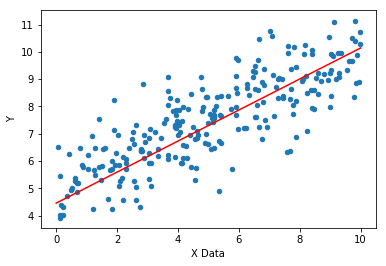

In [45]:
df.sample(n = 250).plot(kind = 'scatter', x = "X Data", y="Y")
plt.plot(new_data, predictions, 'r')